# Gradient Descent

Finding the minima of general functions represents an extremely important task in many use cases of applied mathematics. The most notable example comes in the field of Machine Learning, where, in general, we start with set of training observations, $X$ along with a response variable $y$ and we try to find a Machine Learning model, which is just a function $f(X, \theta)$ depending on certain parameters $\theta$, that tries to approximate $y$ as best as possible.

These are known as **supervised** problems, because we have a set of true responses, $y$ for our training data. The task here is to find the parameters $\theta$ that minimize our 'error', which is the difference between $f(X,\theta)$ and $y$ (in the literature, this error is computed with an extra function called a **loss function**). As you can see, minimizing the error function is crucial to train a meaningful Machine Learning model. And this is only an example of the need to minimize a target function, there are other fields such as Finance or Economics where minima localization algorithms are needed.

So, finding function minima seems to be very important, but, how to we find these minima for functions in general? If you recall from Calculus the local minima of a function are attained where the gradient of this function equals zero. In practice this is not the only option, and we can count with a clever algorithm to find these minima, called **Gradient Descent**. We will study the basics of this algorithm and its variants in this section, as well as provide some examples of how to apply it.

<img src="https://jimmycalvomonge.github.io/appmathpython/_static/gradient.png" alt="gradient" style="width:400px; margin:auto;"/>

## Useful links
Here are some extra resources you can find in the web that talk about this topic. \
*These links are external and we don't take responsibility for any downtime or incovenient caused by them.*

- [Utah Gradient Descent notes](https://users.cs.utah.edu/~jeffp/IDABook/T6-GD.pdf)
- [Real Python: Stochastic Gradient Descent Algorithm With Python and NumPy](https://realpython.com/gradient-descent-algorithm-python/)
- [Stat Quest Gradient Descent](https://www.youtube.com/watch?v=sDv4f4s2SB8)

## Let's review the theory

### Gradient review

You have a real-valued function $f: \mathbb{R}^n \to \mathbb{R}$ (possibly multivariate), and you want an $x_0 \in \mathbb{R}^n$ which is a local minimum of $f(x)$. This means that there is a neighborhood $B_{\epsilon}(x)$ in which $f(x)$ attains a minimum at $x_0$. For example, in the next figure, we use $f(x)=x^3-3x^2+2x-1$ and we can see that the approximate point $(1.577, -1.385)$ is a local minima of $f(x)$, because is a minimum in the neighborhood $]1,2[$ (highlighted in yellow).

Note that this point is not a *global* minimum of this function, that is, is not the point at which $f(x)$ has a minimal value overall, because $f(x)$ decreases as $x$ moves to $-\infty$. We are interested in finding *local* minima for the problem that concerns us today. If a point is a global minimum, then it is also, trivially, a local minimum as well.

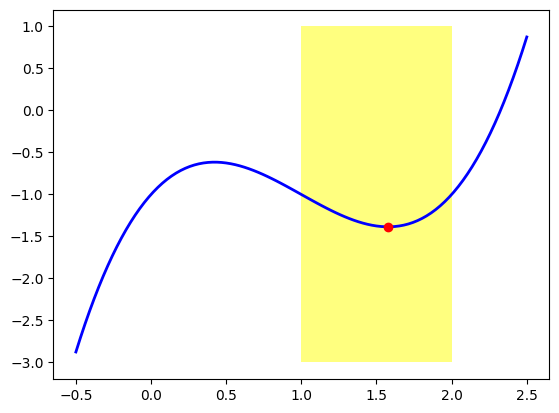

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

xx = np.linspace(-0.5, 2.5, 100)
fx = [x**3 -3*x**2 +2*x -1 for x in xx]

ax = plt.gca()
rect = Rectangle((1,-3), 1, 4, fc='yellow', alpha=0.5)
ax.add_patch(rect)

plt.plot(xx, fx, linewidth=2, color='b')
plt.plot(1.577, -1.385, "or")
plt.show()

Now, how to we find this point? As we saw in Calculus 101 at college, we can compute the gradient of $f(x)$ and find points at which this gradient is zero. Remember that for a differentiable function $f:\mathbb{R}^n \to \mathbb{R}$, its gradient is given by the vector

$
\nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \cdots, \frac{\partial f}{\partial x_n}\right),
$

formed by the partial derivatives of $f(x)$. In $n=1$ dimensions, this is just the derivative $\nabla f(x) = f'(x)$. 

### Using `np.gradient`

To compute derivatives, `Numpy` has the `gradient` method which uses a second order approximation for the derivative at an interior point of an interval. 

Specifically, it uses the fact that the derivative $f'(x)$ can be approximated with the formula:

$
f'(x) = \frac{f(x+h)-f(x-h)}{2h} + \mathcal{O}(h^2).
$

For points that are at the extremes of an interval, we can use the formulas:

$
f'(x) = \frac{f(x+h)-f(x)}{h} + \mathcal{O}(h) \quad \text{For the left extreme of an interval}.
$

and

$
f'(x) = \frac{f(x)-f(x-h)}{h} + \mathcal{O}(h) \quad \text{For the right extreme of an interval}.
$

If you use the method `np.gradient` with an array of values $[y_1, \cdots, y_1]$, then, by default, `Numpy` assumes you have provided value $y_1=f(x_1), \cdots, y_n=f(x_n)$ where $x_1, \cdots, x_n$ are separated by a distance of $h=1$ between each other, that is: $x_2=x_1+h$, $x_3=x_2+h$ and so on. So it will apply the formulas above using that value for $h$. Let's see an example.

In [8]:
np.gradient(np.array([0, 3, 2, 4.5, 7]))

array([3.  , 1.  , 0.75, 2.5 , 2.5 ])

Verifying:

- $\frac{3-0}{1} = 3$.
- $\frac{2-0}{2} = 1$.
- $\frac{4.5-3}{2} = 0.75$.
- $\frac{7-2}{2} = 2.5$.
- $\frac{7-4.5}{1} = 2.5$.

*In this case x+h is the value that follows x in the sequence, and x-h is the previous one.*
  
If we put an $h$ parameter in this function we can control this behavior:

In [6]:
np.gradient(np.array([0, 3, 2, 4.5, 7]), 0.5) # Verify that these are the calculations obtained by putting h=0.5 in the above formulas.

array([6. , 2. , 1.5, 5. , 5. ])

Clearly this calculation becomes more trustworthy as $h$ becomes smaller. To compute a gradient accurately with `Numpy` you should provide the values of $f(x)$ at a list of $x$ values each separated by a distance of a sufficiently small $h$. Let's find the gradient of the function of the above example.

The consecutive distance between these values is h=0.01507537688442212


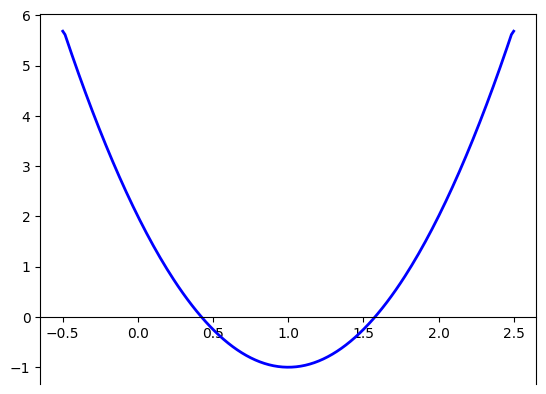

In [16]:
xx = np.linspace(-0.5, 2.5, 200)
h = xx[1] - xx[0] # np.linspace gives us equally separated points in an interval
print(f'The consecutive distance between these values is h={h}')
fx = [x**3 -3*x**2 +2*x -1 for x in xx]
# We find the gradient:
gradfx = np.gradient(fx, h)
# get the axis 
ax = plt.gca()
# enforce placement of x-axis at y=0
ax.spines['bottom'].set_position('zero')
# We plot it:
plt.plot(xx, gradfx, linewidth=2, color='b')
plt.show()

As we expect the gradient should be a second degree polynomial, with two zeros, one for each of the critical points of $f(x)$.

In this case we already know that the gradient of $f$ is $f'(x)=3x^2-6x+2$, but we wanted to show how to compute it numerically (life is not just polynomials or nice functions!).

To find the minima we look for we could find the zeros of this gradient by any other numerical method (for example, Newton-Raphson). A more simple approach in this case is that we could also try to find the critical points: where the sign of the gradient changes.

In [36]:
idxxs = []
for idx, val in enumerate(gradfx):
    if idx < len(gradfx) - 1:
        # Append index if its next value has different sign.
        if gradfx[idx]*gradfx[idx+1] < 0:
            idxxs.append(idx)

# Of all these indices find the one for which f has the minimum value.
idx_use = np.argmin([fx[i] for i in idxxs])
# The min is the value of x at this index.
min_at = xx[idxxs[idx_use]]
print(f'The minimum is attained approximately at x={min_at}')

The minimum is attained approximately at x=1.5653266331658289


This gives an approximation to our point of $x=1.577$. 

*Notes:*

- Another resource to keep exploring the `np.gradient` method: [Numpy Gradient: Returning the Gradient of N-dimensional Array](https://www.askpython.com/python-modules/numpy/numpy-gradient).

- The `np.gradient` can also be applied to higher dimensional functions (arrays). The same technique applies and we can use the same approximation functions for partial derivatives. For example:

$
\frac{\partial f}{\partial x_i}(x) = \frac{f(x+ he_i) - f(x-he_i)}{2h},
$
where $e_i$ is the $i$-th elementary vector.

For example, this assumes to send an array of the form $\{f(x_0 + kh, x_0 + kh)\}$ for $k=0,1$.

In [45]:
vals = np.array([
    [1.2, 3.4, 5.6],
    [7.8, 9.0, 0.1]
])
np.gradient(vals)

[array([[ 6.6,  5.6, -5.5],
        [ 6.6,  5.6, -5.5]]),
 array([[ 2.2 ,  2.2 ,  2.2 ],
        [ 1.2 , -3.85, -8.9 ]])]

Also it's not necessary to pass equally values at equally spaced points. You can pass a vector of $h$'s as a second coordinate to the `np.gradient` function:

In [52]:
ar = np.array([1.2, 3.4, 5.6], dtype = float)
sp = np.array([7.8, 9.0, 0.1], dtype = float)
np.gradient(ar,sp)

array([ 1.83333333,  2.15757089, -0.24719101])

- This is an option to find the local minima of $f$, and it is sort of a *naive* approach, because it follows the textbook definition of local minima to find points that satisfy this definition.
- In practice, for higher dimensions and more complex minimization problems, the most reasonable approach would be to use an iterative method such as Newton-Raphson to find the zeros of the gradient $\nabla f(x)$. We inspected a change of sign in the derivative to find the critical points for this simple example, but this doesn't scale well in general (think about it: you would have to compute the gradient for each point in your domain if you want to know where it changed signs!). 

Is there another approach? Something more *clever*? 🤔

There is actually, it is named *gradient descent* and gives us a nice and clean approximation method for finding our desired minima.
Let's review the basic principle behind it in the following section.

### Gradient descent algorithm

There's a common [analogy](https://en.wikipedia.org/wiki/Gradient_descent#:~:text=An%20analogy%20for%20understanding%20gradient%20descent,-Fog%20in%20the&text=Persons%20are%20stuck%20in%20the,information%20to%20find%20the%20minimum.) to understand the gradient descent method: 

*Image you find yourself at a mountanous terrain, blindfolded -and you are not able to remove this blindfold from your face- and you desire to get to a valley within this landscape, that is to a plain, bottom-like place. Assuming there are no obstacles in your way, how would you do that? You could follow this recipe: feel the ground sorrounding you, move in the direction that has the steepest slope downwards, at this new location do the same and move again, continue this way until you arrive at a valley, where all directions arround you have no significant slope downwards.*

This sounds to us perhaps too evident, but it is the basic principle behind the gradient descent algorithm to find minima of functions. The mountanous terrain in this case is the graph of our function, and the valley we look for is the desired local minimum of our function.

The gradient descent algorithms starts with a specified point $x_0$, then finds the direction of greatest slope downwards arround this point and moves a step in that direction to arrive to another point $x_1$, and then repeats the same process again and again until convergence. Eventually, it is expected that the algorithm will arrive at a 'valley': a point that really has no downwards steep directions, this point should be a local minimum of the function we are using. 

A nice approach, right? 😃

<img src="https://jimmycalvomonge.github.io/appmathpython/_static/walk_down_hill.jpg" alt="gradient" style="width:400px; margin:auto;"/>

*Note*
These type of algorithms are called **iterative algorithms** because they involve constructing a sequence of points that converges to a desired point.

It is well known from multivariate calculus, that the direction of the steepest slope of a function arround a point is given by $\nabla f$, the gradient of $f$. Therefore, this is the direction used to update our points in the sequence that will converge to the desired local minimum. In pseudo-code, this algorithm looks like this:

Gradient Descent ($\nabla f$, $x_0$, $\alpha$, $\tau$):

$
\begin{align*}
& \text{Set } k=0, \\
& \text{while } ||\nabla f(x_k) || \geq \tau: \\
& \quad x_{k+1} := x_k - \alpha \nabla f(x_{k}) \\
& \text{return } x_k
\end{align*}
$

In one variable, this is very simple and is just a matter of updating by the derivative of $f(x)$, so it would look like this:

$
\begin{align*}
& \text{Set } k=0, \\
& \text{while } |\nabla f(x_k)| \geq \tau: \\
& \quad x_{k+1} := x_k - \alpha f'(x_{k}) \\
& \text{return } x_k
\end{align*}
$

Some comments:
1. The initial point $x_0$ used to start the algorithm needs to be provided. We will talk about random initial point selection techniques below, and about the impact of this selection in the algorithm performance.
2. The value of $\alpha$ is known as the **learning rate** and it controls how strongly should be our movement at each step. You could move just a little bit in the direction of steepest descent, or be more bold and move more agressively! This parameter is very influential on the speed and overall results of the gradient descent process. We will discuss about this down below.
3. The $\tau$ parameter is the **tolerance**, the algorithm will stop when the gradient has a norm or absolute value less than this tolerance. This tells us to stop because we have arrived at a point that has a gradient that is close to zero, so this might be our local minimum point. Other conditions can be placed, for example surpassing a maximum number of iterations.

Let's see how this algorithm behaves with our example function $f(x)=x^3-3x^2+2x-1$ from above. We will perform the iteration, store the values of $x_0, x_1,x_2, \cdots$ and plot them to see how the process becomes closer our minimum point target.

In [117]:
# Basic Gradient descent algorithm
def gradient_descent(gradient_func, x_0, alpha, tol, maxiter):
    """
    Gradient descent algorithm function.
    args:
    gradient_func: gradient function.
    x_0: starting point.
    alpha: learning rate.
    tol: tolerance for gradient.
    maxiter: maximum number of iterations allowed.
    returns:
    sequence values of gradient descent algorithm.
    """

    sequence_vals = [x_0]
    x = x_0
    k = 0

    while k < maxiter: # stopping condition
        gradient_val = gradient_func(x) # update the value of the gradient at the latest point
        if np.abs(gradient_val) < tol:
            break # get out of the loop if the norm of the gradient is smaller than the tolerance
        
        x = x - alpha*gradient_val # update the value of x with the previous val
        sequence_vals.append(x) # append the new point to the sequence
        k += 1 # update the number of iterations that have taken place so far

    return sequence_vals

# Example of gradient descent with our basic 1D function
def my_func(x):
    return x**3 - 3*x**2 + 2*x - 1

def my_gradient(x):
    # The derivative of this function:
    return 3*x**2 - 6*x + 2

seq_vals = gradient_descent(my_gradient, x_0=0.5, alpha=0.1, tol=0.001, maxiter=100)
print(len(seq_vals)) # This took 30 iterations

30


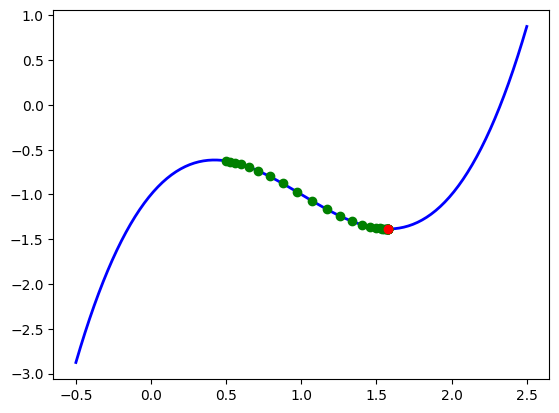

In [118]:
xx = np.linspace(-0.5, 2.5, 100)
fx = [my_func(x) for x in xx]
plt.plot(xx, fx, linewidth=2, color='b')

for val in seq_vals:
    plt.plot(val, my_func(val), "og")
plt.plot(1.577, -1.385, "or")
plt.show()

Ww have plotted our sequence $\{x_k\}$ and we see that with each iteration their values seem to approach our desired local minimum. Yay! 
Let's see an example with a multivariate function. For this case we will take $f(x,y)= - \text{exp}[-((x-1)^2 + (y-1)^2)] + \text{exp}[-((x-1)^2 + y^2)]$ which has a local minimum at $(1,1)$.

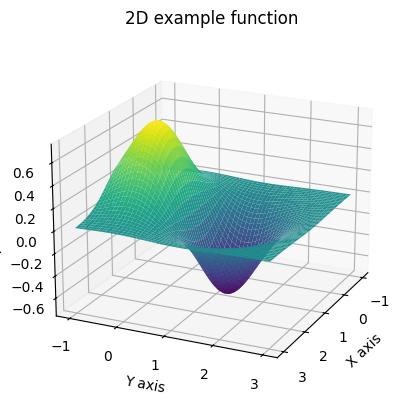

In [123]:
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def my_func2(x, y):
    return -np.exp(-((x-1)**2 + (y-1)**2)) + np.exp(-((x-1)**2 + (y-0)**2))

# Generate the data
x = np.linspace(-1, 3, 400)
y = np.linspace(-1, 3, 400)
x, y = np.meshgrid(x, y)
z = my_func2(x, y)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# Labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title("2D example function")

# Rotate the plot
ax.view_init(elev=20, azim=25)  # Adjust the elevation and azimuthal angles as needed

# Show the plot
plt.show()

In this case 

$
\begin{align*}
\nabla f = \biggl( 2(x-1) \bigl(\text{exp}[-((x-1)^2 + (y-1)^2)] - \text{exp}[-((x-1)^2 + y^2)] \bigr), \\
2(y-1)\cdot\text{exp}[-((x-1)^2 + (y-1)^2)] - 2y\cdot\text{exp}[-((x-1)^2 + y^2)] \biggr)
\end{align*}
$

In [120]:
def my_gradient2(xx):
    x = xx[0]
    y = xx[1]
    return np.array([
        2*(x-1)*(np.exp(-((x-1)**2 + (y-1)**2)) - np.exp(-((x-1)**2 + (y-0)**2))),
        2*(y-1)*np.exp(-((x-1)**2 + (y-1)**2)) - 2*y*np.exp(-((x-1)**2 + (y-0)**2))
    ])

In [122]:
# Let's do a small change to the gradient_descent function to compute the norm of the gradient:
def abs_val(val):
    if isinstance(val, np.ndarray):
        return np.linalg.norm(val)
    else:
        return np.abs(val)

# Basic Gradient descent algorithm
def gradient_descent(gradient_func, x_0, alpha, tol, maxiter):
    """
    Gradient descent algorithm function.
    args:
    gradient_func: gradient function.
    x_0: starting point.
    alpha: learning rate.
    tol: tolerance for gradient.
    maxiter: maximum number of iterations allowed.
    returns:
    sequence values of gradient descent algorithm.
    """

    sequence_vals = [x_0]
    x = x_0
    k = 0
    while k < maxiter: # stopping condition
        gradient_val = gradient_func(x) # update the value of the gradient at the latest point
        if abs_val(gradient_val) < tol:
            break # get out of the loop if the norm of the gradient is smaller than the tolerance
        
        x = x - alpha*gradient_val # update the value of x with the previous val
        sequence_vals.append(x) # append the new point to the sequence
        k += 1 # update the number of iterations that have taken place so far

    return sequence_vals

seq_vals2 = gradient_descent(my_gradient2, x_0=np.array([0,0]), alpha=0.1, tol=0.001, maxiter=100)
print(len(seq_vals2))

96


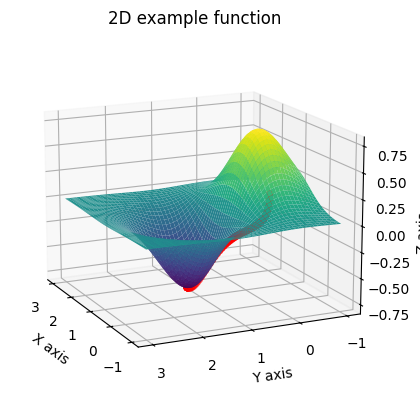

In [138]:
# Let's plot these values:

# Generate the data
x = np.linspace(-1, 3, 400)
y = np.linspace(-1, 3, 400)
x, y = np.meshgrid(x, y)
z = my_func2(x, y)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

seq_vals2_x = [val[0] for val in seq_vals2]
seq_vals2_y = [val[1] for val in seq_vals2]
seq_vals2_z = [my_func2(val[0], val[1]) for val in seq_vals2]

ax.scatter(seq_vals2_x, seq_vals2_y, seq_vals2_z, c='r', marker='o')

# Labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title("2D example function")

# Rotate the plot
ax.view_init(elev=15, azim=155)  # Adjust the elevation and azimuthal angles as needed

# Show the plot
plt.show()

The sequence of red points converges to the local minimum of this function, as we expected.
Hopefully these examples show you the advantage of this iterative method, and how it can provide us with a clean way of arriving to these local minima.

However, this is not the end of the story, and there's a lot we can say about the importance of the hyperparameters in the gradient descent performance.

### Learning rate and other inconveniences

## Stochastic gradient descent

...

## Other variants of gradient descent

...

## Applications and examples

...